## Mock data - Smiles

In [80]:
if '../' not in sys.path:
    sys.path.append('../')
from src.data.parse_data import *
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
import re
from IPython.display import SVG, display

In [23]:
# we can do sth like this later on:
# def get_smiles(compound_id):
#     r = requests.get(f'https://ecbd.eu/compound/{compound_id}')
#     assert(r.status_code == 200), f'Status code: {r.status_code}'
#     soup = BeautifulSoup(r.content, "html.parser")
#     smiles = soup.find(id='smiles')
#     return Chem.MolFromSmiles(smiles)

In [38]:
# mock data got from https://www.ebi.ac.uk/chembl/
chem_data = pd.read_csv(f'../data/raw/mock_data.csv')
chem_data.head(3)

,ChEMBL ID,CMPD ID,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,...,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL2368696,99629,0,1418.92,1.0,2.0,None,None,None,None,...,-1,None,None,None,None,1418.2599,None,C40H45N32O22P3,[N-]=[N+]=Nc1nc2c(N)ncnc2n1[C@@H]1O[C@H](COP(=...,MECYXKPTPRZDEK-QHZFWZHOSA-N
1,CHEMBL2368698,99630,0,1498.90,1.0,2.0,None,None,None,None,...,-1,None,None,None,None,1498.2262,None,C40H46N32O25P4,[N-]=[N+]=Nc1nc2c(N)ncnc2n1[C@@H]1O[C@H](COP(=...,XHIKJSKQFMFXAJ-QHZFWZHOSA-N
2,CHEMBL3628613,99631,0,3863.64,1.0,1.0,None,None,None,None,...,-1,None,None,None,None,3860.9853,None,C189H265N49O36S2,[N-]=[N+]=NCCCCCC(=O)NCCCC(=O)N[C@@H](CCCCNC(=...,HWRJPKRFDYQTMY-JMDIYLTGSA-N


In [34]:
# get assays data
df_list = list()
for i in range(4, 7):
    df_list.append((parse_data(f'Assay {i}.xlsx'), f'Assay {i}.xlsx'))
combined = combine_assays(df_list)
combined.head()

,CMPD ID,BARCODE ASSAY PLATE - Assay 4,WELL - Assay 4,ROW - Assay 4,COLUMN - Assay 4,VALUE - Assay 4,WELL TYPE - Assay 4,CMPD+MEAN(VALUE) - Assay 4,CMPD+STANDARD DEVIATION(VALUE) - Assay 4,CMPD+MEDIAN(VALUE) - Assay 4,...,CTRL POS+STANDARD DEVIATION(VALUE) - Assay 6,CTRL POS+MEDIAN(VALUE) - Assay 6,Z' - Assay 6,Z' ROBUST - Assay 6,% INHIBITION - Assay 6,Z SCORE - Assay 6,MEAN(% INHIBITION) - Assay 6,STANDARD DEVIATION(% INHIBITION) - Assay 6,THRESHOLD - Assay 6,ACTIVITY THRESHOLD - Assay 6
0,99629,B1001L2002L03F,A01,1,1,24740,CMPD,25409.119318,7164.628944,26670.0,...,140.629167,1152.5,0.942359,0.942536,-15.886739,0.897249,5.048436,9.87545,34.674785,INACTIVE
1,99630,B1001L2002L03F,C01,3,1,19085,CMPD,25409.119318,7164.628944,26670.0,...,140.629167,1152.5,0.942359,0.942536,-17.203030,0.967559,5.048436,9.87545,34.674785,INACTIVE
2,99631,B1001L2002L03F,E01,5,1,26340,CMPD,25409.119318,7164.628944,26670.0,...,140.629167,1152.5,0.942359,0.942536,-15.360223,0.869125,5.048436,9.87545,34.674785,INACTIVE
3,99632,B1001L2002L03F,G01,7,1,32160,CMPD,25409.119318,7164.628944,26670.0,...,140.629167,1152.5,0.942359,0.942536,-19.356962,1.082613,5.048436,9.87545,34.674785,INACTIVE
4,99633,B1001L2002L03F,I01,9,1,26970,CMPD,25409.119318,7164.628944,26670.0,...,140.629167,1152.5,0.942359,0.942536,-7.737699,0.461964,5.048436,9.87545,34.674785,INACTIVE


In [42]:
res = combined.copy()
res = res.merge(chem_data, on='CMPD ID')
res.head(3)

,CMPD ID,BARCODE ASSAY PLATE - Assay 4,WELL - Assay 4,ROW - Assay 4,COLUMN - Assay 4,VALUE - Assay 4,WELL TYPE - Assay 4,CMPD+MEAN(VALUE) - Assay 4,CMPD+STANDARD DEVIATION(VALUE) - Assay 4,CMPD+MEDIAN(VALUE) - Assay 4,...,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
0,99629,B1001L2002L03F,A01,1,1,24740,CMPD,25409.119318,7164.628944,26670.0,...,-1,None,None,None,None,1418.2599,None,C40H45N32O22P3,[N-]=[N+]=Nc1nc2c(N)ncnc2n1[C@@H]1O[C@H](COP(=...,MECYXKPTPRZDEK-QHZFWZHOSA-N
1,99630,B1001L2002L03F,C01,3,1,19085,CMPD,25409.119318,7164.628944,26670.0,...,-1,None,None,None,None,1498.2262,None,C40H46N32O25P4,[N-]=[N+]=Nc1nc2c(N)ncnc2n1[C@@H]1O[C@H](COP(=...,XHIKJSKQFMFXAJ-QHZFWZHOSA-N
2,99631,B1001L2002L03F,E01,5,1,26340,CMPD,25409.119318,7164.628944,26670.0,...,-1,None,None,None,None,3860.9853,None,C189H265N49O36S2,[N-]=[N+]=NCCCCCC(=O)NCCCC(=O)N[C@@H](CCCCNC(=...,HWRJPKRFDYQTMY-JMDIYLTGSA-N


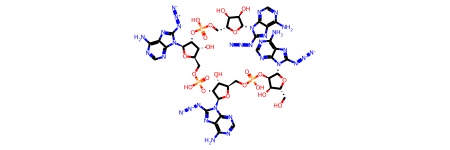

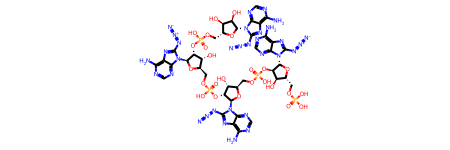

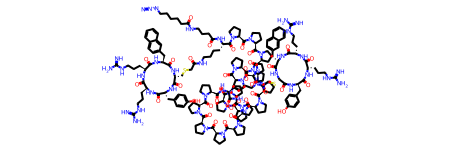

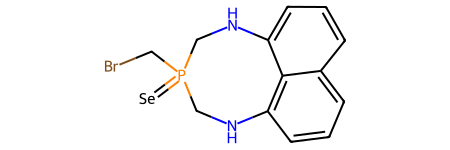

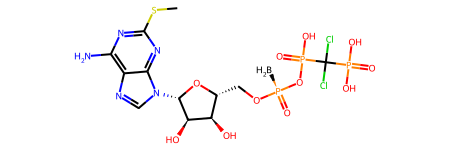

In [63]:
for i in range(5):
    display(Chem.MolFromSmiles(res.iloc[i]['Smiles']))

In [55]:
def get_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Chem.RDKFingerprint(mol)

In [64]:
ex1_smiles = res.iloc[0]['Smiles']
ex2_smiles = res.iloc[8]['Smiles']



ex1_fp = get_fingerprint(ex1_smiles)
ex2_fp = get_fingerprint(ex2_smiles)

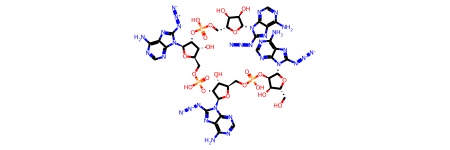

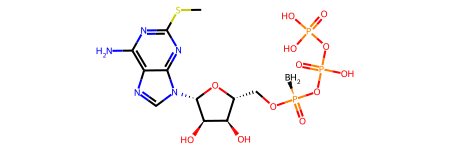

0.7473684210526316

In [65]:
display(Chem.MolFromSmiles(ex1_smiles))
display(Chem.MolFromSmiles(ex2_smiles))
DataStructs.FingerprintSimilarity(ex1_fp,ex2_fp)

In [79]:
# GET SVG FILE
def DrawMol(mol, molSize=(450,150), kekulize=True):
    pattern = re.compile("<\?xml.*\?>")
    mc = Chem.MolFromSmiles(mol)
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        Chem.rdDepictor.Compute2DCoords(mc)

    drawer = rdMolDraw2D.MolDraw2DSVG(*molSize)
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:', '')
    svg = re.sub(pattern, '', svg)
    return svg

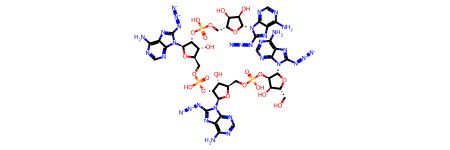

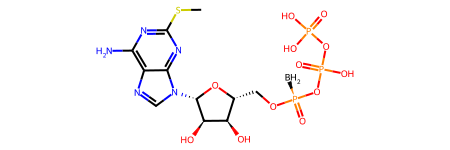

In [82]:
display(SVG(DrawMol(ex1_smiles)))
display(SVG(DrawMol(ex2_smiles)))